In [1]:
# references
# https://github.com/lechemrc/CS-Build-Week/blob/master/src/project.ipynb
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

In [2]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### Create Random Dataset

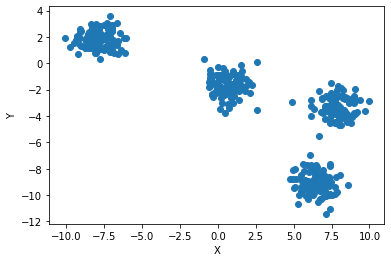

In [3]:
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.80, random_state=6) # n_samples: 생성할 데이터 총 개수, centers: 생성할 군집의 수
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### K-means Algorithm without scikit-learn library

In [4]:
def recalculate_clusters(X, centroids, k):
    """ Recalculates the clusters """
    # Initiate empty clusters
    clusters = {}
    # Set the range for value of k (number of centroids)
    for i in range(k):
        clusters[i] = []
    # Setting the plot points using dataframe (X) and the vector norm (magnitude/length)
    for data in X:
        # Set up list of euclidian distance and iterate through
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j]))
        # Append the cluster of data to the dictionary
        clusters[euc_dist.index(min(euc_dist))].append(data)
    return clusters    
 
def recalculate_centroids(centroids, clusters, k):
    """ Recalculates the centroid position based on the plot """ 
    for i in range(k):
        # Finds the average of the cluster at given index
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

def plot_clusters(centroids, clusters, k):
    """ Plots the clusters with centroid and specified graph attributes """ 
    colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple']
    plt.figure(figsize = (6, 4))  
    area = (20) ** 2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % k], alpha=0.6)          
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=200)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def cal_inertia(centroids, clusters, k, rep):
    WCSS = 0
    for i in range(k):
        for j in range(len(clusters[i])):
            WCSS = WCSS + np.linalg.norm(clusters[i][j] - centroids[i])
    print("Iteration {} --> Inertia: {:.2f}".format(rep, WCSS))

def k_means_clustering(X, centroids={}, k=4, repeats=5):
    """ Calculates full k_means_clustering algorithm """
    idx = np.random.choice(len(X), k, replace=False)
    print(idx)
    for i in range(k):
        # Sets up the centroids based on the data
        centroids[i] = X[idx[i]]

    # Outputs the recalculated clusters and centroids 
    print(f'Results of {repeats} iterations')
    for i in range(repeats):        
        clusters = recalculate_clusters(X, centroids, k)  
        plot_clusters(centroids, clusters, k)
        cal_inertia(centroids, clusters, k, i)
        centroids = recalculate_centroids(centroids, clusters, k)

[398 125 328 339]
Results of 5 iterations


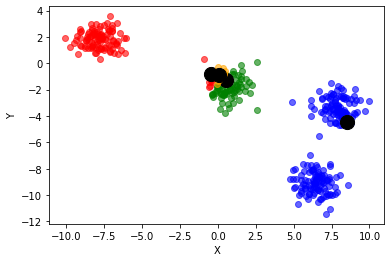

Iteration 0 --> Inertia: 1543.38


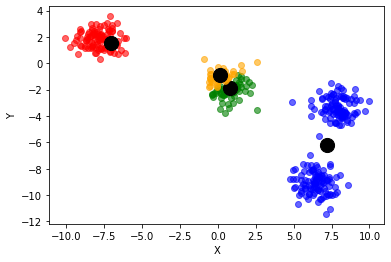

Iteration 1 --> Inertia: 813.22


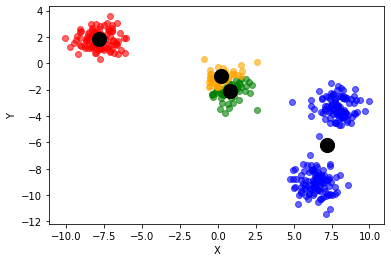

Iteration 2 --> Inertia: 783.94


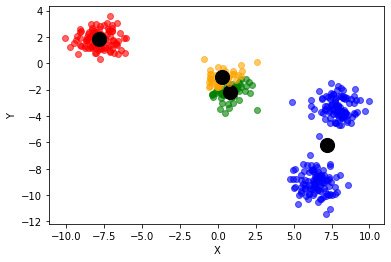

Iteration 3 --> Inertia: 783.89


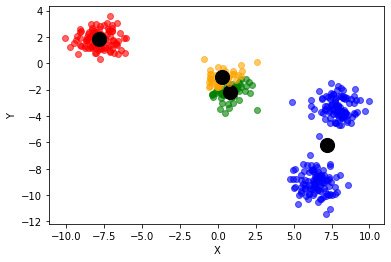

Iteration 4 --> Inertia: 783.93


In [5]:
np.random.seed(1) # seed 숫자를 변경하여 centroids 초기 위치를 변경 할 수 있음, 변경해보면서 local, global minimum 개념 살펴보기
k_means_clustering(X, k=4) # k: cluster의 갯수